# 单变量线性回归

时间：2022年4月2日，是根据该文件夹之内的ML-Exercise1 跟着练习的，熟悉了一下plt，numpy和pandas，有不懂的地方可以阅读ML-Exercise1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('ex1data1.txt',header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


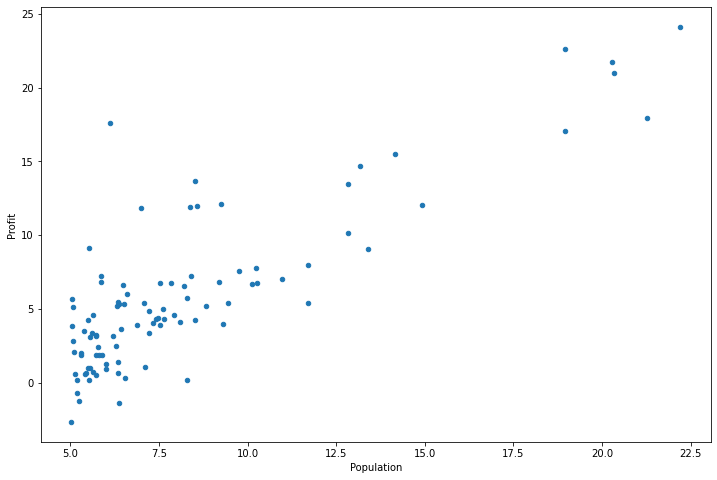

In [4]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 以下代码示例中实现的方程在“练习”文件夹中的“ex1.pdf”中有详细说明。

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left(\theta \right)=\frac{1}{2m} \sum\limits_{i=1}^{m} {{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中:
$$h_{\theta}\left(x\right)=\theta^{T}X=\theta_{0}x_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$$
$x_0$常常是1，$\theta_0x_0$通常是常数项，这么写主要是为了格式统一

In [5]:
def computeCost(X,y,theta):
    inner=np.power(((X*theta.T)-y),2) #power即指数函数，X*theta.T-y的二次方
    return np.sum(inner)/(2*len(X))

In [6]:
data.insert(0,'Ones',1)#在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
# set X (training data) and y (target variable)
cols=data.shape[1]#shape(1)获取的是data的列数，cols即为data有多少列
X=data.iloc[:,0:cols-1] #iloc的获取是左闭右开的,X是所有行，去掉最后一列
y=data.iloc[:,cols-1:cols] #y是所有行，去掉最后一列

In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
X=np.matrix(X.values)
y=np.matrix(y.values)
theta=np.matrix(np.array([0,0]))

theta是一个1×2 的矩阵

In [11]:
theta

matrix([[0, 0]])

看一看 X， y 和 theta 的维度

In [12]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

计算代价函数，其中theta初始为0

In [13]:
computeCost(X,y,theta)

32.072733877455676

# Batch Gradient Descent(批量梯度下降)

$$\theta_j:=\theta_j-\alpha\frac{\partial}{\partial\theta_j}J(\theta)$$
由于
$$\frac{\partial}{\partial\theta_j}J\left(\theta\right)=\frac{\partial}{\partial\theta_j}\frac{1}{2m} \sum\limits_{i=1}^{m} {{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}=\frac{1}{2m}\sum\limits_{i=1}^m\frac{\partial}{\partial\theta_j}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}=\frac{1}{2m}\sum\limits_{i=1}^{m}2\left(h_\theta\left(x^i\right)-y^i\right)x_{j}^{i}$$
最后有
$$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum\limits_{i=1}^m\left(h\left(x^{i}\right)-y^{i}\right)x_{j}^{i}$$

In [14]:
def gradientDescent(X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1])  ##ravel的作用是将数组压平成一位数组,theta压平的shape[1]为2
    cost=np.zeros(iters)
    
    for i in range(iters):
        error=(X*theta.T)-y
        
        for j in range(parameters):
            term=np.multiply(error,X[:,j]) #multiply的作用是计算内积
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))
            
        theta=temp
        cost[i]=computeCost(X,y,theta)
        
    return theta,cost

代码中的term变量即为$\left(h\left(x^{i}\right)-y^{i}\right)^{2}x_{j}^{i}$,而temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))对应的就是$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum\limits_{i=1}^m\left(term\right)$,即更新公式

初始化一些附加变量 - 学习速率α和要执行的迭代次数。这两个数据是所谓的超参数，需要自己设置和调试

In [15]:
alpha=0.01
iters=1000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。g就是最后求出来的最小化代价函数的$\theta$, 是一个一行二列的矩阵

In [16]:
g,cost=gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [17]:
computeCost(X,y,g)

4.515955503078914

numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
在指定的间隔范围内返回均匀间隔的数字。

在[start, stop]范围内计算，返回num个(默认为50)均匀间隔的样本。

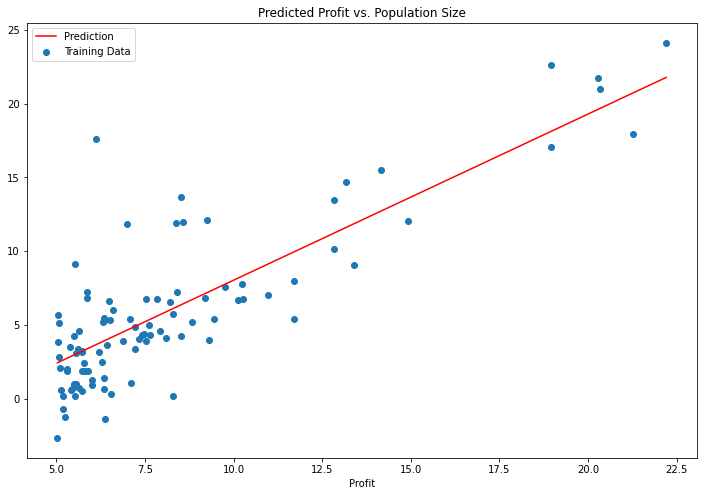

In [18]:
x=np.linspace(data.Population.min(),data.Population.max(),100) 
f=g[0,0]+(g[0,1]*x)

fig, ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')  #plot是直线
ax.scatter(data.Population,data.Profit,label='Training Data')  #scatter是散点
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_xlabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

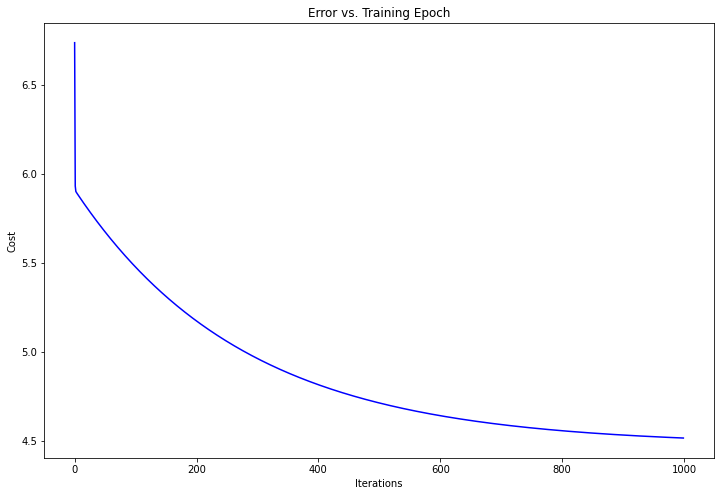

In [19]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 多变量线性回归

In [20]:
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [21]:
data2=(data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [22]:
data2.insert(0,'Ones',1)
# set X (training data) and y (target variable)
cols=data2.shape[1]#shape(1)获取的是data的列数，cols即为data有多少列
X2=data2.iloc[:,0:cols-1] #iloc的获取是左闭右开的,X是所有行，去掉最后一列
y2=data2.iloc[:,cols-1:cols] #y是所有行，去掉最后一列

# convert to matrices and initialize theta
X2=np.matrix(X2.values)
y2=np.matrix(y2.values)
theta2=np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

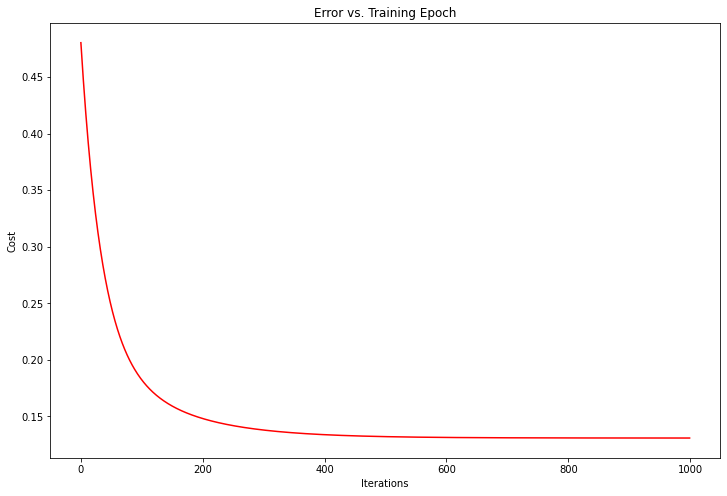

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

#  normal equation（正规方程）

正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [24]:
#正规方程
def normalEqn(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [25]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

在练习2中，我们将看看分类问题的逻辑回归。